In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv("customer_support_tickets.csv")

In [3]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [4]:
df.tail()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0
8468,8469,Steven Davis MD,lori20@example.net,53,Other,Philips Hue Lights,2020-06-01,Billing inquiry,Hardware issue,There seems to be a hardware problem with my {...,Open,NaN,High,Phone,NaN,NaN,NaN


In [5]:
df.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.shape

(8469, 17)

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [10]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

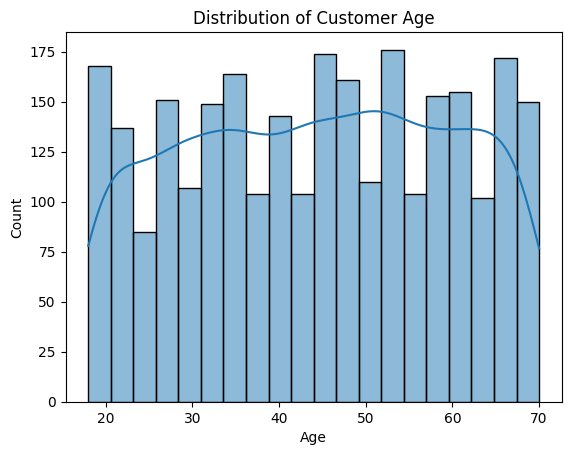

In [19]:
sns.histplot(df['Customer Age'], bins=20, kde=True)
plt.title("Distribution of Customer Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

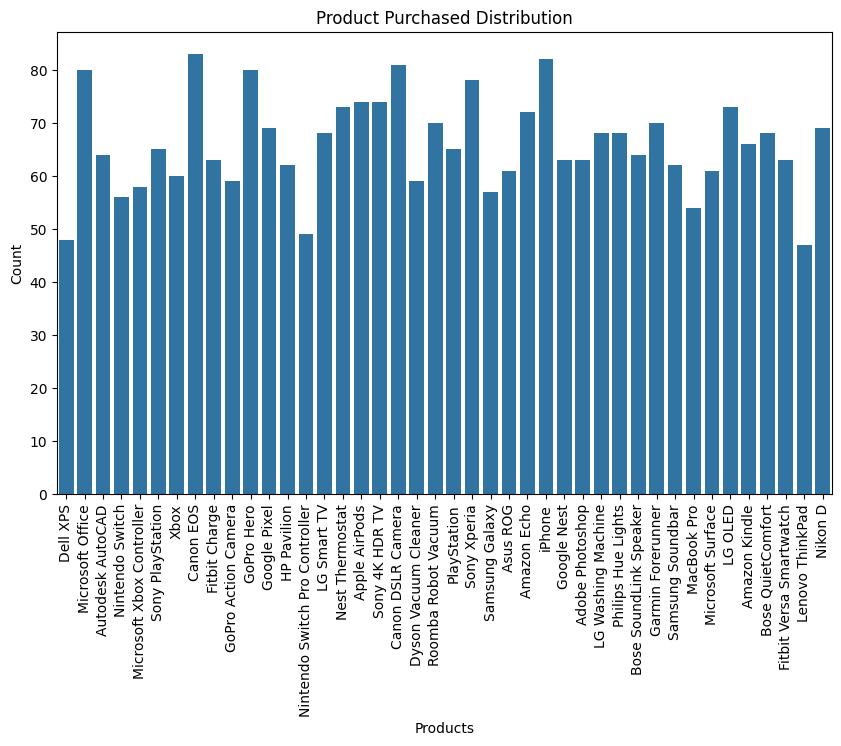

In [44]:
plt.figure(figsize =(10,6))
sns.countplot(x='Product Purchased', data = df)
plt.title("Product Purchased Distribution")
plt.xlabel ('Products')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

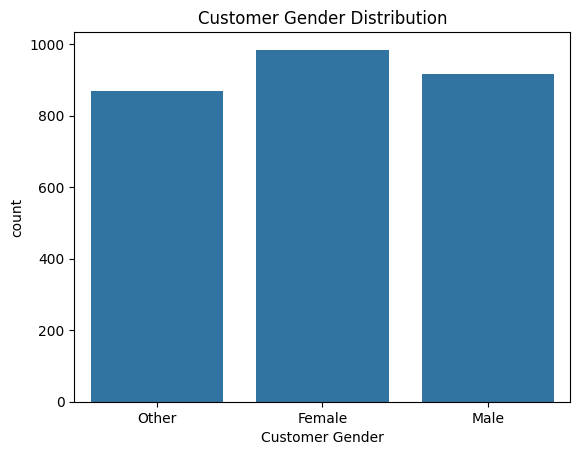

In [20]:
sns.countplot(x ='Customer Gender',data=df)
plt.title("Distribution of Customer Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

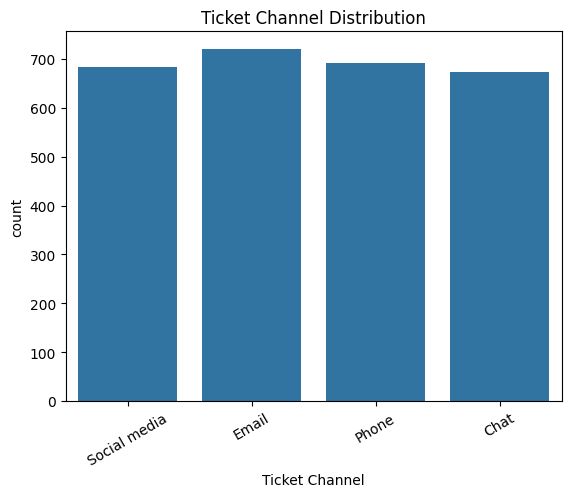

In [39]:
sns.countplot(x='Ticket Channel', data=df)
plt.title("Ticket Channel Distribution")
plt.xticks(rotation=30)
plt.show()

<ipython-input-41-3913058154>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted',


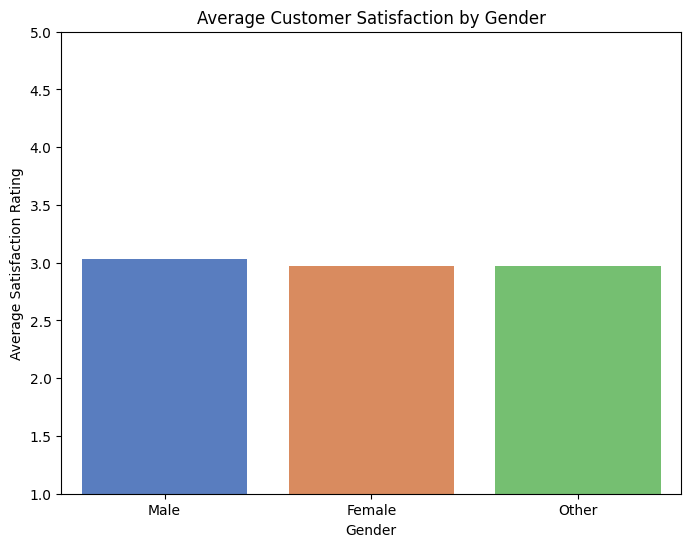

In [41]:
average_satisfaction = df.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted',
order=['Male', 'Female', 'Other'])
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1, 5)
plt.show()

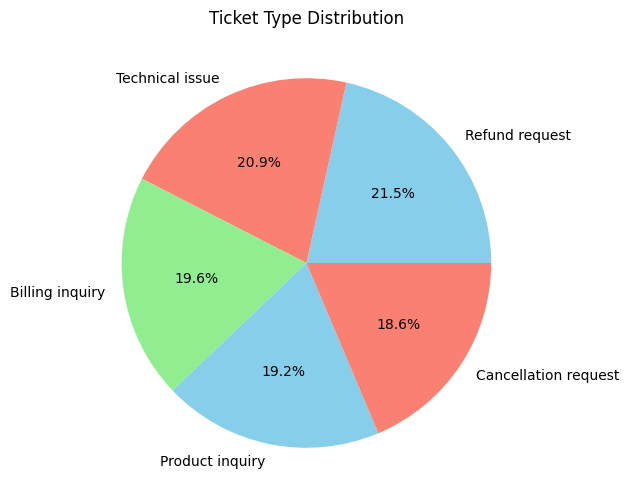

In [45]:
ticket_type_distribution = df['Ticket Type'].value_counts()
plt.figure(figsize=(8, 6))
ticket_type_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Ticket Type Distribution')
plt.ylabel('')
plt.show()

<ipython-input-46-3913058154>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted',


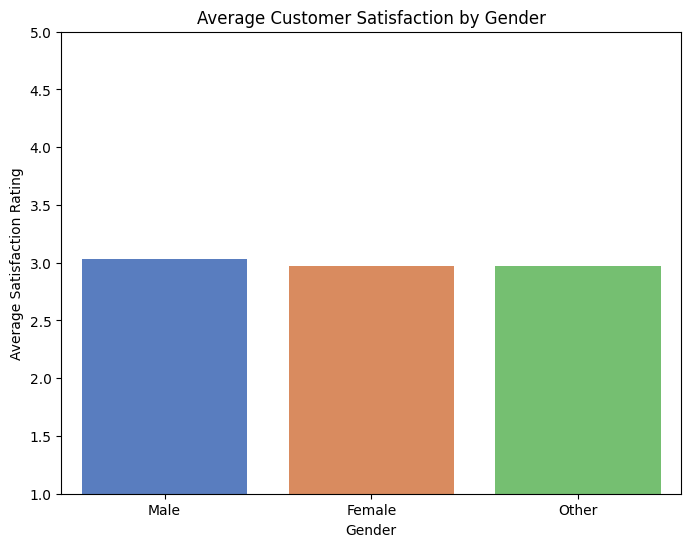

In [46]:
average_satisfaction = df.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted',
order=['Male', 'Female', 'Other'])
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1, 5)
plt.show()

<ipython-input-47-2624625479>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_purchased_distribution.index,


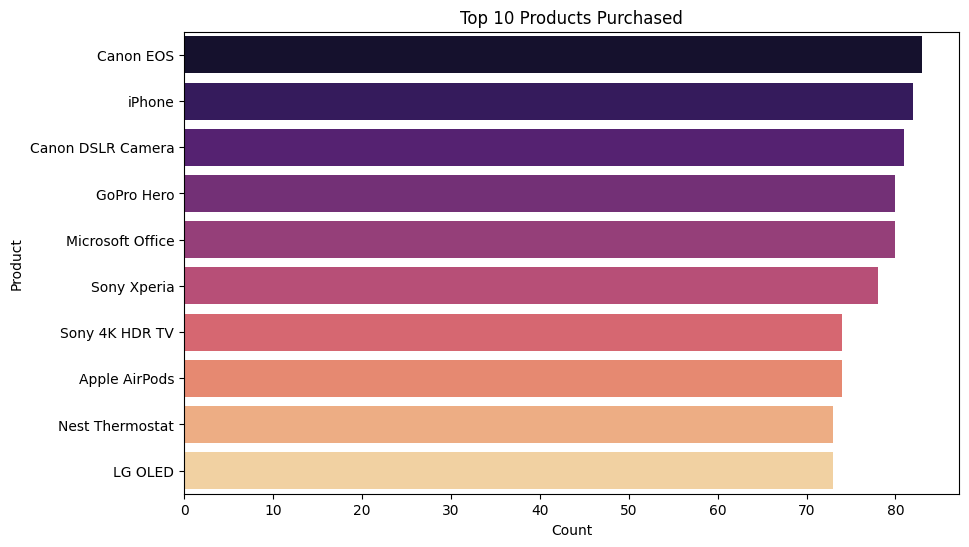

In [47]:
plt.figure(figsize=(10, 6))
product_purchased_distribution = df['Product Purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index,
x=product_purchased_distribution, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

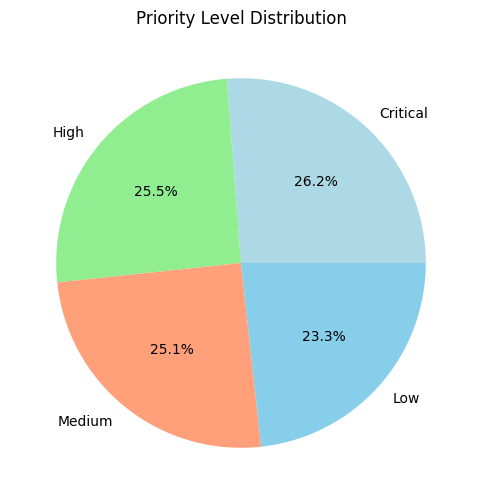

In [49]:
priority_distribution = df['Ticket Priority'].value_counts()
plt.figure(figsize=(8, 6))
priority_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['lightblue', 'lightgreen', 'lightsalmon', 'skyblue'])
plt.title('Priority Level Distribution')
plt.ylabel('')
plt.show()

<ipython-input-50-3296188829>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tickets_by_age_group = df.groupby('Age Group').size()


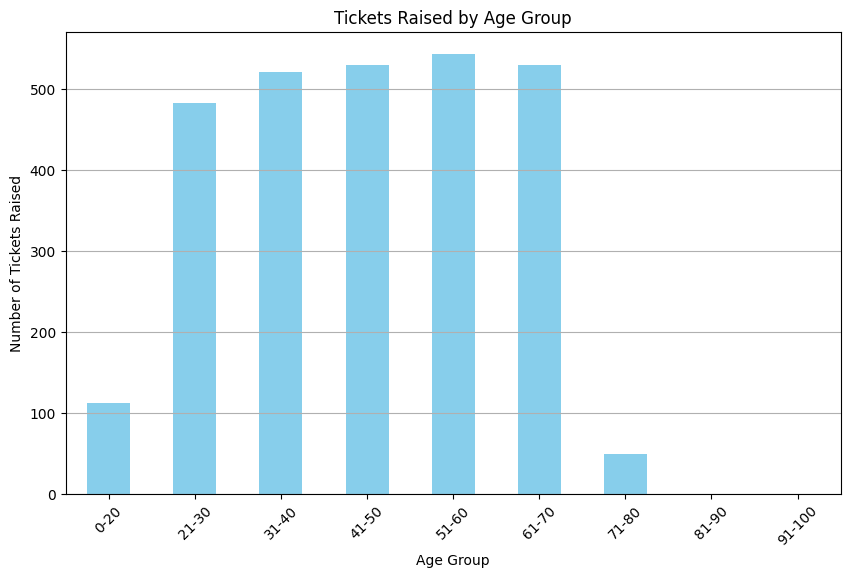

In [50]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70',
'71-80', '81-90', '91-100']
df['Age Group'] = pd.cut(df_model['Customer Age'], bins=bins,
labels=labels, right=False)
tickets_by_age_group = df.groupby('Age Group').size()
plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Top 10 Common Issues:
Ticket Subject
Network problem           201
Software bug              199
Product compatibility     195
Product recommendation    186
Product setup             183
Hardware issue            183
Delivery problem          178
Refund request            178
Battery life              173
Account access            171
Name: count, dtype: int64


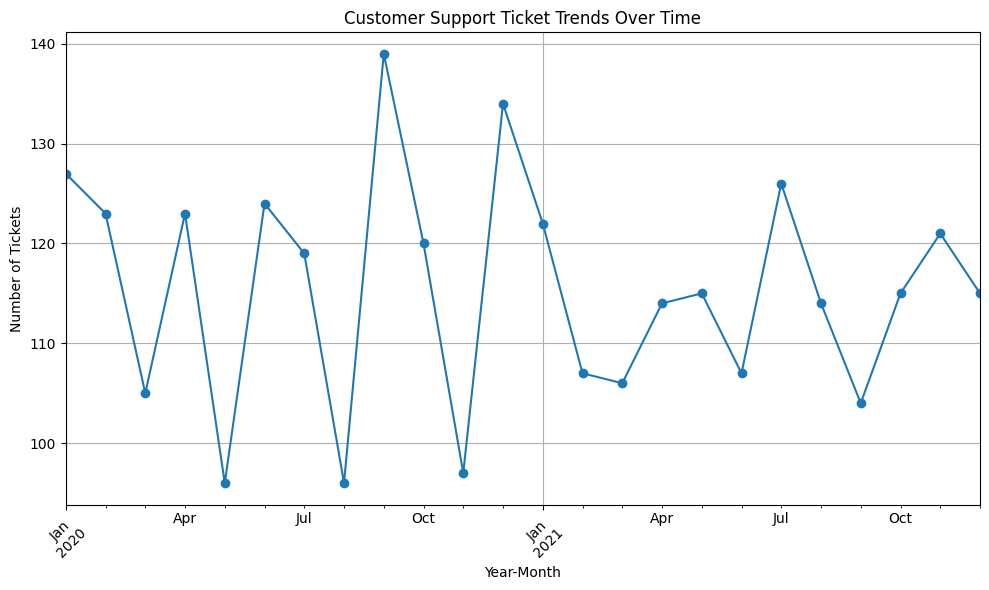

In [52]:
common_issues = df['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['YearMonth'] = df['Date of Purchase'].dt.to_period('M')
ticket_trends = df.groupby('YearMonth').size()
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

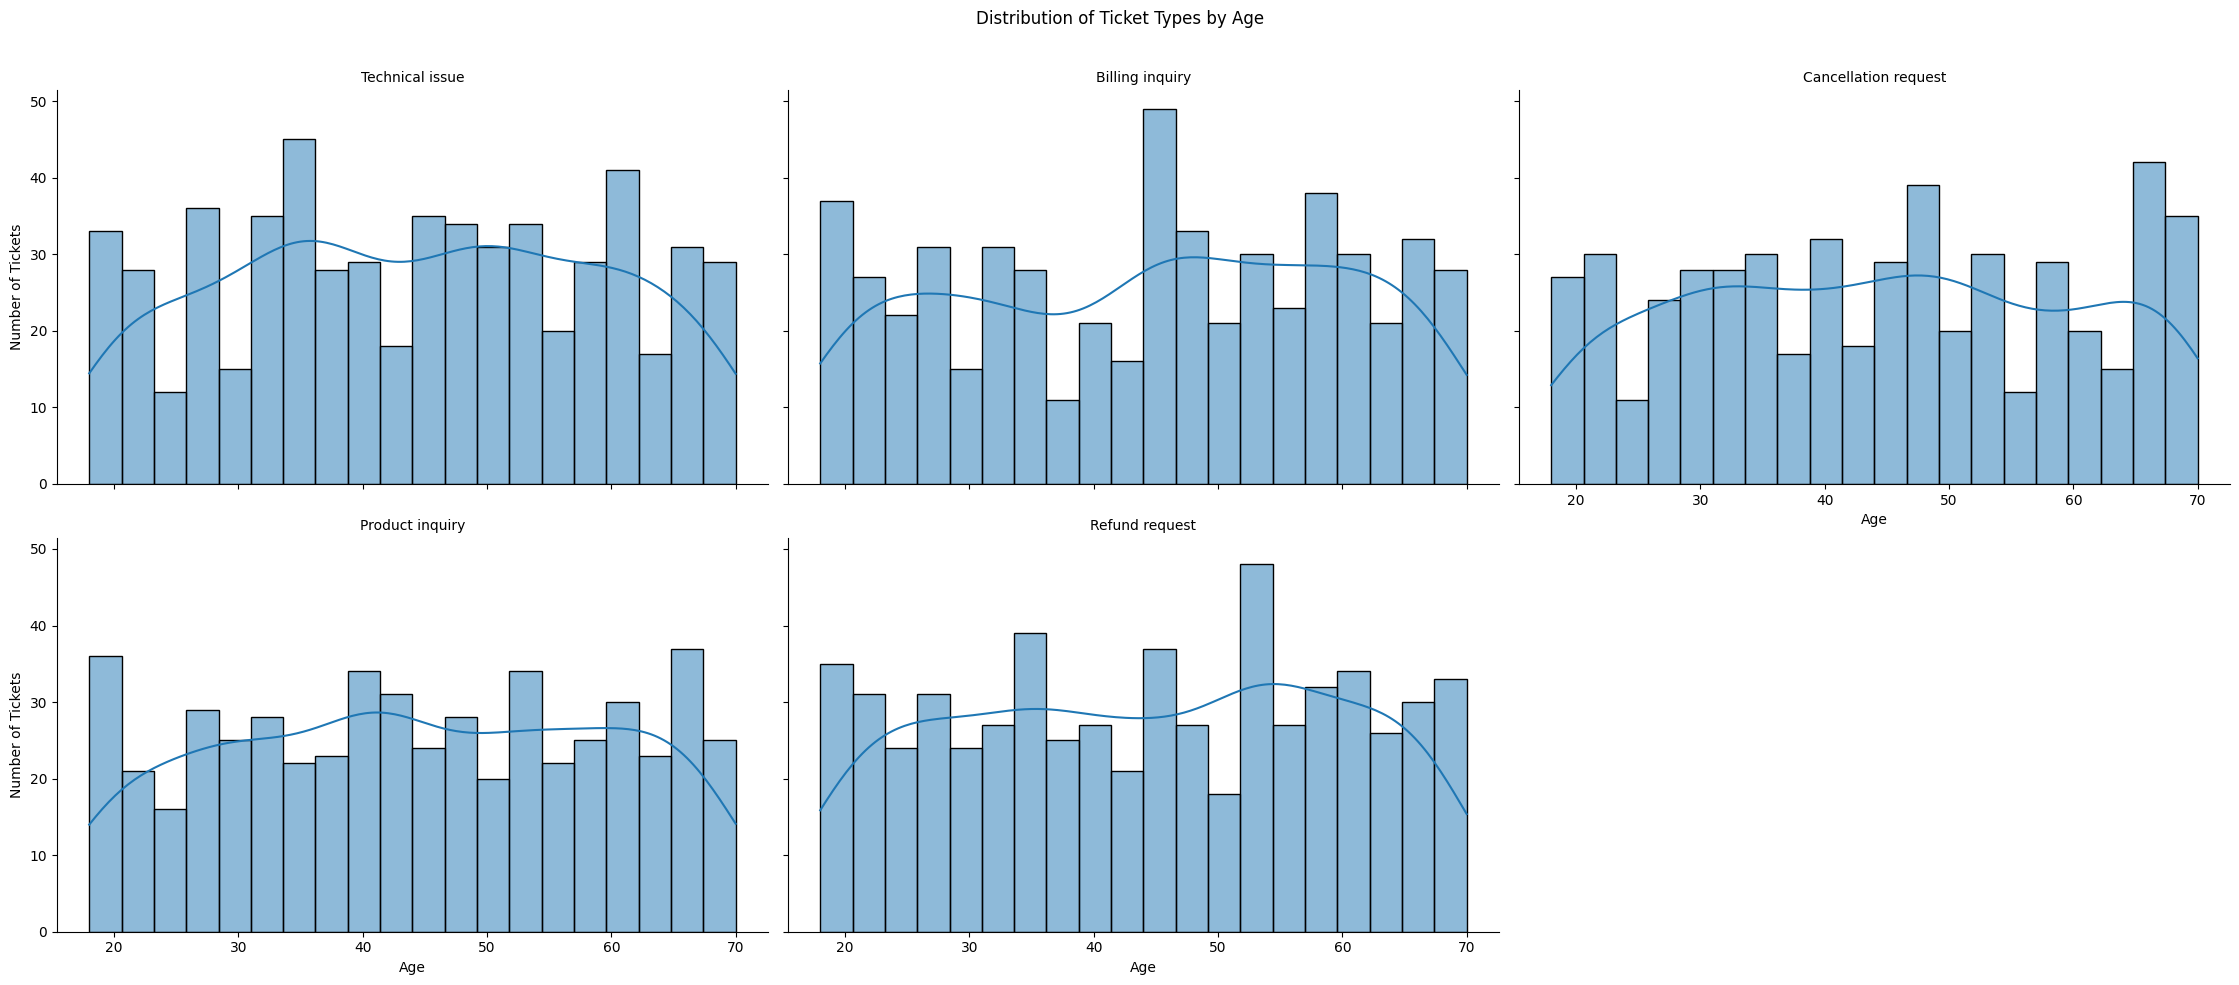

In [36]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
g = sns.FacetGrid(df, col='Ticket Type', col_wrap=3,
height=5, aspect=1.5)
g.map(sns.histplot, 'Customer Age', bins=20, kde=True)
g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')
plt.show()

In [17]:
df_model = df.copy()
label_encoders = {}
for column in df_model.select_dtypes(include=['object']).columns:
    if column not in ['Customer Satisfaction Rating', 'Customer Email']:  # Don't encode these
        le = LabelEncoder()
        df_model[column] = le.fit_transform(df_model[column])
        label_encoders[column] = le

In [283]:
X = df_model.drop(['Customer Satisfaction Rating', 'Customer Email', 'Date of Purchase', 'First Response Time', 'Time to Resolution'], axis=1)
y = df_model['Customer Satisfaction Rating']

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [286]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [287]:
y_pred = LR.predict(X_test)

In [288]:
print (accuracy_score(y_test,y_pred))

0.22563176895306858
